In [1]:
import tensorflow as tf


2021-07-12 13:22:37.010448: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2021-07-12 13:22:37.010504: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


In [13]:
!wget https://s3-us-west-1.amazonaws.com/udacity-selfdrivingcar/traffic-signs-data.zip
!unzip traffic-signs-data.zip -d traffic-signs-data

--2021-07-12 13:39:21--  https://s3-us-west-1.amazonaws.com/udacity-selfdrivingcar/traffic-signs-data.zip
Resolving s3-us-west-1.amazonaws.com (s3-us-west-1.amazonaws.com)... 52.219.112.48
Connecting to s3-us-west-1.amazonaws.com (s3-us-west-1.amazonaws.com)|52.219.112.48|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 123524425 (118M) [application/zip]
Saving to: ‘traffic-signs-data.zip’

traffic-signs-data. 100%[===================>] 117,80M  1,71MB/s    in 81s     

2021-07-12 13:40:43 (1,46 MB/s) - ‘traffic-signs-data.zip’ saved [123524425/123524425]

Archive:  traffic-signs-data.zip
  inflating: traffic-signs-data/test.p  
  inflating: traffic-signs-data/train.p  
  inflating: traffic-signs-data/valid.p  


In [14]:
import pickle
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.image as mpimg
import tensorflow as tf
from PIL import Image
import cv2
import os

In [15]:
training_file = 'traffic-signs-data/train.p'
validation_file= 'traffic-signs-data/valid.p'
testing_file = 'traffic-signs-data/test.p'

with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(validation_file, mode='rb') as f:
    valid = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)
    
X_train, y_train = train['features'], train['labels']
X_valid, y_valid = valid['features'], valid['labels']
X_test, y_test = test['features'], test['labels']

In [7]:
help (tf.keras.layers.MaxPool2D
     )

Help on class MaxPooling2D in module tensorflow.python.keras.layers.pooling:

class MaxPooling2D(Pooling2D)
 |  MaxPooling2D(*args, **kwargs)
 |  
 |  Max pooling operation for 2D spatial data.
 |  
 |  Downsamples the input along its spatial dimensions (height and width)
 |  by taking the maximum value over an input window
 |  (of size defined by `pool_size`) for each channel of the input.
 |  The window is shifted by `strides` along each dimension.
 |  
 |  The resulting output,
 |  when using the `"valid"` padding option, has a spatial shape
 |  (number of rows or columns) of:
 |  `output_shape = math.floor((input_shape - pool_size) / strides) + 1`
 |  (when `input_shape >= pool_size`)
 |  
 |  The resulting output shape when using the `"same"` padding option is:
 |  `output_shape = math.floor((input_shape - 1) / strides) + 1`
 |  
 |  For example, for `strides=(1, 1)` and `padding="valid"`:
 |  
 |  >>> x = tf.constant([[1., 2., 3.],
 |  ...                  [4., 5., 6.],
 |  ...  

In [22]:
model = tf.keras.models.Sequential([
    tf.keras.layers.InputLayer(input_shape=(32,32,3)),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Conv2D(filters=6, strides=(1,1), kernel_size=(5,5), 
                           activation='relu', padding="VALID"),
    tf.keras.layers.MaxPool2D(pool_size=(2,2), strides=(2,2), padding="SAME"),
    tf.keras.layers.Conv2D(filters=16, strides=(1,1), kernel_size=(5,5), 
                           activation='relu', padding="VALID"),
    tf.keras.layers.MaxPool2D(pool_size=(2,2), strides=(2,2), padding="SAME"),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(units=120, activation='relu'),
    tf.keras.layers.Dense(43, activation='softmax')
])
model.summary()


Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
batch_normalization_1 (Batch (None, 32, 32, 3)         12        
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 28, 28, 6)         456       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 14, 14, 6)         0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 10, 10, 16)        2416      
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 5, 5, 16)          0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 400)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 120)              

In [23]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), 
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
history = model.fit(X_train, y_train, validation_data=(X_valid, y_valid), epochs=15, batch_size=128)

Epoch 1/15
272/272 [==============================] - 13s 45ms/step - loss: 1.2590 - accuracy: 0.6669 - val_loss: 0.6131 - val_accuracy: 0.8429
Epoch 2/15
272/272 [==============================] - 13s 46ms/step - loss: 0.2610 - accuracy: 0.9308 - val_loss: 0.5135 - val_accuracy: 0.8712
Epoch 3/15
272/272 [==============================] - 14s 53ms/step - loss: 0.1451 - accuracy: 0.9648 - val_loss: 0.4310 - val_accuracy: 0.8918
Epoch 4/15
272/272 [==============================] - 16s 58ms/step - loss: 0.0955 - accuracy: 0.9765 - val_loss: 0.4422 - val_accuracy: 0.8966
Epoch 5/15
272/272 [==============================] - 13s 48ms/step - loss: 0.0734 - accuracy: 0.9806 - val_loss: 0.4004 - val_accuracy: 0.9134
Epoch 6/15
272/272 [==============================] - 16s 59ms/step - loss: 0.0508 - accuracy: 0.9876 - val_loss: 0.4116 - val_accuracy: 0.9118
Epoch 7/15
272/272 [==============================] - 13s 48ms/step - loss: 0.0373 - accuracy: 0.9909 - val_loss: 0.4159 - val_accuracy:

In [24]:
model.evaluate(X_test, y_test)

395/395 [==============================] - 2s 5ms/step - loss: 0.6805 - accuracy: 0.9116


[0.6805441379547119, 0.9115597605705261]

28
23
27
23
40


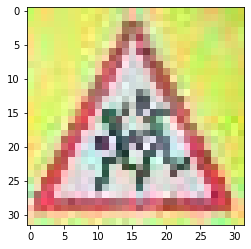

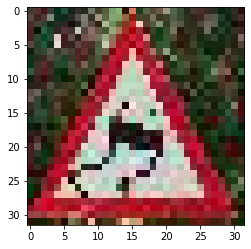

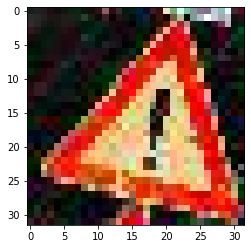

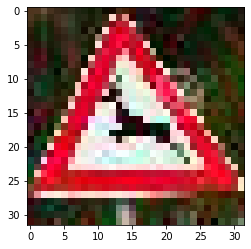

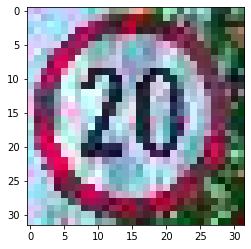

In [27]:
import os
import matplotlib.pyplot as plt
import numpy as np
imgs = os.listdir('resized')
for el in imgs:
    if not el.endswith('.jpg'): continue
    img = plt.imread(os.path.join('resized', el))
    img2 = np.float32(img.reshape(1,32,32,3))
    res = model.predict(img2)
    print(np.argmax(res[0]))
    fig, ax = plt.subplots()
    ax.imshow(img)

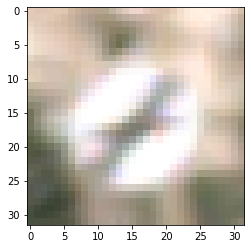

In [30]:
plt.imshow(X_train[32].astype(np.uint8), cmap='gray')